In [446]:
%matplotlib inline  
import pandas as pd
import numpy as np
#from sklearn.decomposition import PCA as pca
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist, pdist
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv('seismic-bumps.csv', index_col=False, header=0)
x_names = df.columns.tolist()[0:len(df.columns.tolist()) - 1]
x = df[x_names]
y = df[['class']]
print(len(x.columns))

18


In [447]:
#Passar colunas categoricas para numericas
seismic = np.unique(x[['seismic']])
seismoacoustic = np.unique(x[['seismoacoustic']])
shift = np.unique(x[['shift']])
ghazard = np.unique(x[['ghazard']])

print(seismic)
print(seismoacoustic)
print(shift)
print(ghazard)
x[['seismic']] = x[['seismic']].applymap(lambda x: 0 if x == 'a' else 1)
x[['seismoacoustic']] = x[['seismoacoustic']].applymap(lambda x: 0 if x == 'a' else (1 if x == 'b' else 2 ))
x[['shift']] = x[['shift']].applymap(lambda x: 0 if x == 'N' else 1)
x[['ghazard']] = x[['ghazard']].applymap(lambda x: 0 if x == 'a' else 1 if x == 'b' else 2 )
x.to_csv('sismo_dataset.csv',index=False)

['a' 'b']
['a' 'b' 'c']
['N' 'W']
['a' 'b' 'c']


In [448]:
print(x.columns.tolist())
print("------------------------")

#Scalling data
scaler = StandardScaler()
x_ = scaler.fit(x).transform(x)

#PCA
pca = decomposition.PCA()
pca.fit(x_)
print(pca.explained_variance_) 

##So dois componentes
pca.n_components = 2
scores = pca.fit_transform(x_)
print("------------------------")
print(pca.explained_variance_)
print("------------------------")
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print("------------------------")

#Loadings
loadings = pca.components_
df = pd.DataFrame(loadings.reshape(18,2))
df.columns = ['PC1', 'PC2']
df.index   = x.columns
df_p1 = df.sort(['PC1'], ascending=False)
df_p2 = df.sort(['PC2'], ascending=False)
df_p1


['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy']
------------------------
[  3.79585241e+00   2.30615260e+00   2.25364761e+00   1.38330353e+00
   1.12118142e+00   1.04919542e+00   8.68394114e-01   6.66279539e-01
   5.89554994e-01   5.17128251e-01   2.08991376e-01   1.34356525e-01
   1.00763129e-01   4.95443452e-03   2.44648636e-04   7.31338940e-37
   1.05357615e-39   1.90627717e-70]
------------------------
[ 3.79585241  2.3061526 ]
------------------------
[ 0.25305683  0.15374351]
0.406800334156
------------------------


,PC1,PC2
nbumps,0.390872,0.368550
gpuls,0.370716,0.252384
nbumps4,0.320594,0.268953
shift,0.312265,0.169891
gdenergy,0.277112,0.279297
nbumps5,0.272938,0.245461
gdpuls,0.250705,0.000000
nbumps3,0.226772,0.231928
seismoacoustic,0.226549,0.204822
genergy,0.197385,0.049346


Reduced dataset shape: (2584, 2)
Meaning of the 2 components:
0.168 x seismic + 0.059 x seismoacoustic + 0.227 x shift + 0.205 x genergy + 0.312 x gpuls + 0.170 x gdenergy + 0.197 x gdpuls + 0.049 x ghazard + 0.371 x nbumps + 0.252 x nbumps2 + 0.277 x nbumps3 + 0.279 x nbumps4 + 0.251 x nbumps5 + 0.000 x nbumps6 + 0.000 x nbumps7 + 0.000 x nbumps89 + 0.391 x energy + 0.369 x maxenergy
0.110 x seismic + 0.216 x seismoacoustic + 0.227 x shift + 0.232 x genergy + 0.321 x gpuls + 0.269 x gdenergy + 0.273 x gdpuls + 0.245 x ghazard + 0.083 x nbumps + 0.147 x nbumps2 + 0.059 x nbumps3 + -0.067 x nbumps4 + -0.408 x nbumps5 + 0.000 x nbumps6 + 0.000 x nbumps7 + 0.000 x nbumps89 + -0.393 x energy + -0.411 x maxenergy


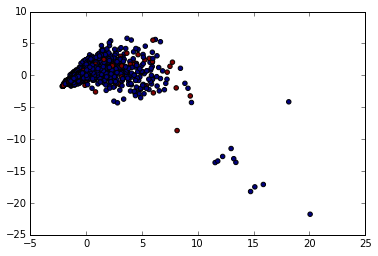

In [449]:
pca = PCA(n_components=2)
pca.fit(x_)
X_reduced = pca.transform(x_)
print "Reduced dataset shape:", X_reduced.shape

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.values)

print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                           x_names))
 

In [450]:
#x = x[['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 
#       'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 
#       'maxenergy']]
x_ = normalize(x)
#x_ = x

/usr/lib/python2.7/dist-packages/sklearn/utils/extmath.py:71: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  np.sqrt(norms, norms)


('For n_clusters =', 2, 'The average silhouette_score is :', 0.65288098721262322)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.62623340681154804)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.66307506192590215)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.73830587291912542)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.82008583016835401)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.96267352441825627)
('For n_clusters =', 8, 'The average silhouette_score is :', 1.0)
('For n_clusters =', 9, 'The average silhouette_score is :', 1.0)


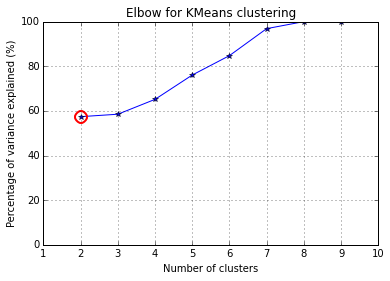

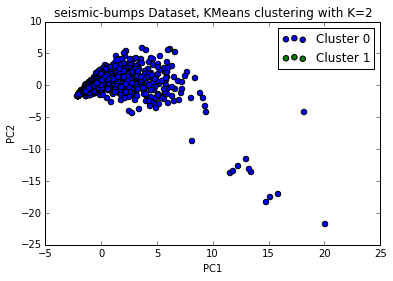

In [451]:
#Nota x_ é x com scalling!

##### cluster data into K=2..10 clusters #####
K = range(2,10)

# scipy.cluster.vq.kmeans
KM  = [KMeans(n_clusters=k, random_state=10, n_init=1, init='random').fit(x_) for k in K]
centroids = [X.cluster_centers_ for X in KM]   # cluster centroids

# The silhouette_score gives the average value for all the samples.
clusters_labels = [KMeans(n_clusters=k, random_state=10, n_init=1, init='random').fit_predict(x_) for k in K]
for label,k in zip(clusters_labels, K):
    silhouette_avg = silhouette_score(x_, label)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

#Calculate the Eucidean distance from
#each point to each cluster center
k_euclid = [cdist(x_, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]


#Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

#Total total sum of squares
tss = sum(pdist(x_)**2)/x.shape[0]

#The between-cluster sum of squares
bss = tss - wcss

##### plot ###
kIdx = 0 #3 k=5, colocar k - 2 do que se quer!
clr = cm.spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
ax.plot(K[kIdx], bss[kIdx]/tss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_xlim((1,max(K) + 1))
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')


# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X_reduced[ind,0],X_reduced[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('seismic-bumps Dataset, KMeans clustering with K=%d' % K[kIdx])
plt.legend()
